# EDA

In [ ]:
pip install squarify 

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as se
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as sk 
from sklearn import model_selection, neighbors, preprocessing, impute
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
#import squarify as sq
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('XY_train.csv') 

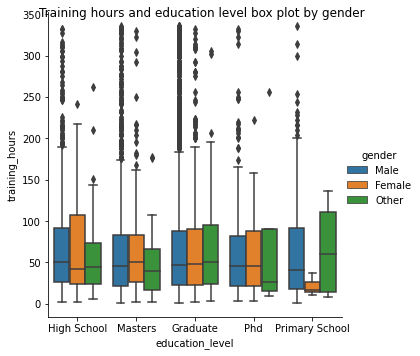

In [ ]:
ax1=se.catplot(y="training_hours",x="education_level",hue="gender",kind="box",data=df)
ax1.fig.suptitle('Training hours and education level box plot by gender')
plt.show() 

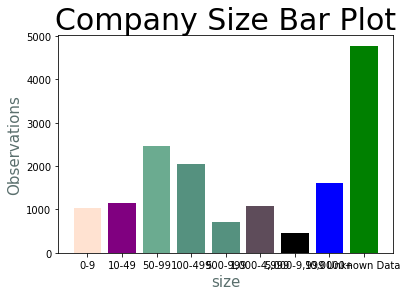

In [ ]:
#Company Size Plot 
cs_plot = [len(df.loc[df.company_size=='<10']),
           len(df.loc[df.company_size=='Oct-49']),
           len(df.loc[df.company_size=='50-99']),
           len(df.loc[df.company_size=='100-500']),
           len(df.loc[df.company_size=='500-999']),
           len(df.loc[df.company_size=='1000-4999']),
           len(df.loc[df.company_size == '5000-9999']),
           len(df.loc[df.company_size=='10000+']),
           len(df.loc[df.company_size.isnull()])
           ]
cs_bars = ['0-9','10-49','50-99','100-499','500-999','1,000-4,999','5,000-9,999','10,0000+','Unknown Data']
cs_colors = ["#FFE2D1","purple","#6BAB90", "#55917F", "#55917F", "#5E4C5A",'black','blue','green']
plt.title("Company Size Bar Plot",fontsize=30, color='black')
plt.xlabel("size", fontsize=15, color='#5A6F6D')
plt.ylabel("Observations",fontsize=15,color='#5A6F6D')
y_pos = np.arange(len(cs_bars))
plt.bar(y_pos, cs_plot, color=cs_colors)
plt.xticks(y_pos, cs_bars)
plt.show()

In [ ]:
df1 = df
df1.target.replace({0:"not looking for job change", 1:"looking for job change"}, inplace=True)
df1 = df1.groupby(["target"]).count().reset_index()

fig = px.bar(df1,
             y=df.groupby(["target"]).size(),
             x="target",
             title="Target value distribution",
             color='target', barmode='stack')
fig.update_yaxes(title_text='Observations')
fig.show()

In [ ]:
df1 = df.groupby(["last_new_job"]).count().reset_index()
fig = px.bar(df1,
             y=df.groupby(["last_new_job"]).size(),
             x="last_new_job",
             title="'Last new job' Bar Chart",
             color='last_new_job', barmode='stack')
fig.update_yaxes(title_text='Observations')
fig.show()

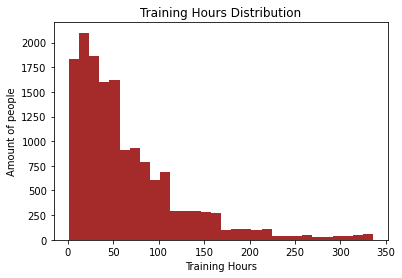

In [ ]:
plt.hist(x = df['training_hours'], bins=30, color='brown')
plt.xlabel('Training Hours')
plt.title('Training Hours Distribution')
plt.ylabel('Amount of people')
plt.show()

In [ ]:
# 1 looking for a joob change # 0 not looking for a job change
df.target = df.target.astype('string')
fig = px.pie(df.replace({'1':'Looking for a job', '0':'Not looking for a job'}), names='target', title='What proportion looked for a job in the end of the program')
# lable and percentage on each slice
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

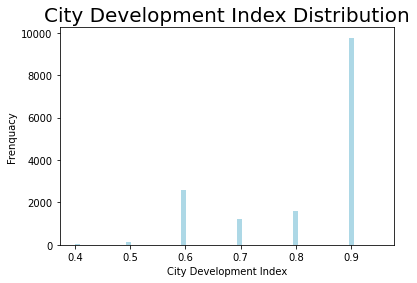

In [ ]:
#Histogram for City Development Index
plt.hist(df['city_development_index'], range=[0.4, 0.95], bins=60, color='lightblue')
plt.title("City Development Index Distribution", fontsize=20)
plt.xlabel("City Development Index", fontsize=10, color='black')
plt.ylabel('Frenquacy', fontsize=10,color='black')
plt.show()

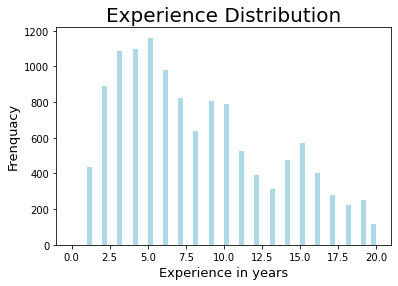

In [ ]:
#Grqph 5- Histogram for Experience
df.experience = df.experience.astype('string')
df_e = df.loc[df.experience != '>20']
df_e = df_e.loc[df.experience != '<1']
df_e.experience = df_e.experience.astype('int')
plt.hist(df_e.experience, range=[0,20], bins=60, color='lightblue')
plt.title("Experience Distribution", fontsize=20)
plt.xlabel("Experience in years", fontsize=13, color='black')
plt.ylabel('Frenquacy', fontsize=13,color='black')
plt.show()

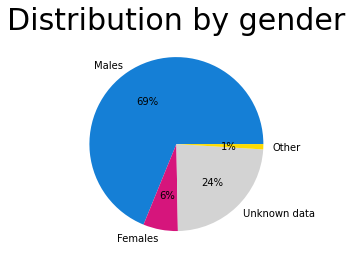

In [ ]:
#Piechart for Gender
males=(len(df.loc[df.gender=='Male'])) #counting the number of males
females=(len(df.loc[df.gender=='Female']))#counting the number of females
nulls=(len(df.loc[df.gender.isnull()]))#counting the number of nulls
other=(len(df.loc[df.gender=='Other']))#counting the number of other values
labels = ["Males", "Females", "Unknown data","Other"]
colors = ["#157FD6","#D6157C","lightgray","#fcdb03"]
genderplot=[males,females,nulls,other]
plt.pie(genderplot,labels=labels,colors=colors,autopct='%1.0f%%')
plt.title("Distribution by gender",fontsize=30,color='black')
plt.show()

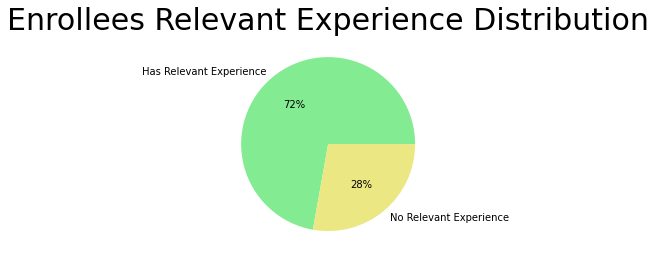

In [ ]:
#Piechart for relevent_experience
re_plot = [len(df.loc[df.relevent_experience=='Has relevent experience']),len(df.loc[df.relevent_experience=='No relevent experience'])]
re_lbels = ['Has Relevant Experience','No Relevant Experience']
re_colors=['#83EB91','#EBE783']
plt.pie(re_plot,labels=re_lbels,colors=re_colors,autopct='%1.0f%%')
plt.title("Enrollees Relevant Experience Distribution",fontsize=30,color="black")
plt.show()

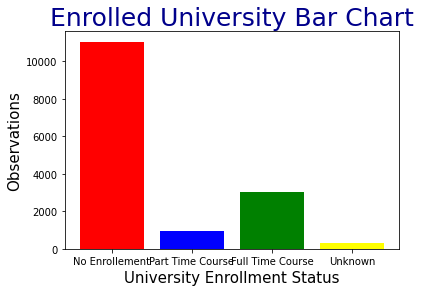

In [ ]:
#enrolled_university
eu_plot = [len(df.loc[df.enrolled_university=='no_enrollment']),
           len(df.loc[df.enrolled_university=='Part time course']),
           len(df.loc[df.enrolled_university=='Full time course']),
           len(df.loc[df.enrolled_university.isnull()])
           ]
bars = ('No Enrollement', 'Part Time Course', 'Full Time Course', 'Unknown')
eu_colors=["red","blue","green","yellow"]
y_pos = np.arange(len(bars))
plt.bar(y_pos, eu_plot, color = eu_colors)
plt.title("Enrolled University Bar Chart", fontsize=25, color='darkblue')
plt.xlabel("University Enrollment Status", fontsize=15, color='black')
plt.ylabel('Observations', fontsize=15,color='black')
plt.xticks(y_pos, bars)
plt.show()

In [ ]:
df_temp = df.groupby('company_type').count().reset_index()
df_temp.sort_values(inplace=True, by='enrollee_id')
fig = go.Figure()
fig.add_trace(go.Bar(x = df_temp.company_type,
                    y = df_temp["enrollee_id"],
                      orientation = "v"
                   )) #set orientation to horizontal because we want to flip the x and y-axis
fig.update_layout(plot_bgcolor = "white",
                    font = dict(color = "#909497"),
                    title = dict(text = "Company types"),
                    xaxis = dict(title = "Company Type", linecolor = "#909497"), 
                    yaxis = dict(title = "Count", tickformat = ",", linecolor = "#909497",
                                categoryorder = "array")) #apply our custom category order
fig.show()

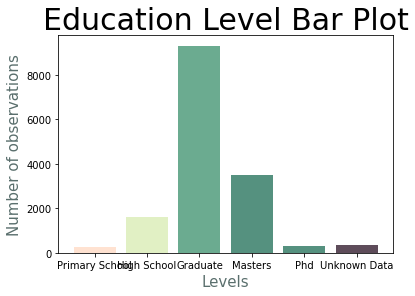

In [ ]:
#Education Level Bar Plot
el_plot = [len(df.loc[df.education_level=='Primary School']),
           len(df.loc[df.education_level=='High School']),
           len(df.loc[df.education_level=='Graduate']),
           len(df.loc[df.education_level=='Masters']),
           len(df.loc[df.education_level=='Phd']),
           len(df.loc[df.education_level.isnull()])
           ]
el_bars = ['Primary School','High School','Graduate','Masters','Phd','Unknown Data']
el_colors = ["#FFE2D1","#E1F0C4","#6BAB90", "#55917F", "#55917F", "#5E4C5A"]
plt.title("Education Level Bar Plot",fontsize=30, color='black')
plt.xlabel("Levels", fontsize=15, color='#5A6F6D')
plt.ylabel("Number of observations",fontsize=15,color='#5A6F6D')
y_pos = np.arange(len(el_bars))
plt.bar(y_pos, el_plot, color=el_colors)
plt.xticks(y_pos, el_bars)
plt.show()

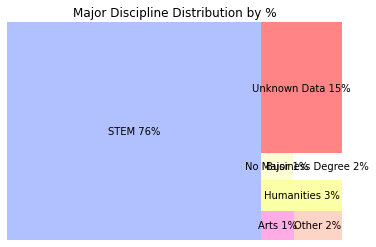

In [ ]:
Total = len(df.loc[df.major_discipline=='STEM'])+ len(df.loc[df.major_discipline=='Arts'])+ len(df.loc[df.major_discipline=='Other'])+len(df.loc[df.major_discipline=='Humanities'])+len(df.loc[df.major_discipline=='No Major'])+len(df.loc[df.major_discipline=='Business Degree'])+len(df.loc[df.major_discipline.isnull()])

df2 = pd.DataFrame({'mjd':[len(df.loc[df.major_discipline=='STEM']),
           len(df.loc[df.major_discipline=='Arts']),
           len(df.loc[df.major_discipline=='Other']),
           len(df.loc[df.major_discipline=='Humanities']),
           len(df.loc[df.major_discipline=='No Major']),
           len(df.loc[df.major_discipline=='Business Degree']),
           len(df.loc[df.major_discipline.isnull()])
           ], 'group':['STEM'+' ' + str(round((len(df.loc[df.major_discipline=='STEM']))/Total*100))+'%'
            ,'Arts'+' ' + str(round((len(df.loc[df.major_discipline=='Arts']))/Total*100))+'%'
            ,'Other'+' ' + str(round((len(df.loc[df.major_discipline=='Other']))/Total*100))+'%'
            ,'Humanities'+' ' + str(round((len(df.loc[df.major_discipline=='Humanities']))/Total*100))+'%'
            ,'No Major'+' ' + str(round((len(df.loc[df.major_discipline=='No Major']))/Total*100))+'%'
            ,'Business Degree'+' ' + str(round((len(df.loc[df.major_discipline=='Business Degree']))/Total*100))+'%'
            ,'Unknown Data'+' ' + str(round((len(df.loc[df.major_discipline.isnull()])/Total*100)))+'%']})

colors=['#91A6FF','#FF88DC','#FDC4AE','#FAFF7F','#FDFFBF','#FFFFFF','#FF5154']
plt.title('Major Discipline Distribution by %')
sq.plot(sizes=df2['mjd'], label=df2['group'], color=colors, alpha=.7,text_kwargs={'fontsize':10})
plt.axis('off')
plt.show()

In [ ]:
"""
x,y = 'city_development_index', 'target'
df_temp = df
target_dict = dict({0:'Not looking for job change', 1: 'Looking for a job change'})
df_temp.target.replace(target_dict, inplace=True)
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = se.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.title("City Development Index and Target Normalized Count plot ")
plt.show()
#works properly on pycharm
"""

Text(0.5, 0.98, 'Training hours & Gender Scatter Plot')

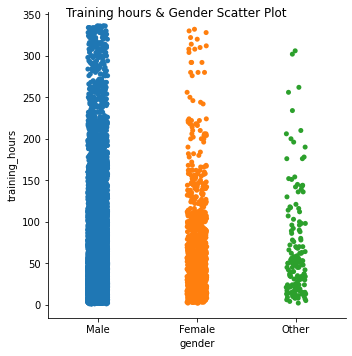

In [ ]:
ax=se.catplot(x="gender",y="training_hours",data=df)
ax.fig.suptitle('Training hours & Gender Scatter Plot')

Text(0.5, 0.98, 'Revlevant experience & City Develompent index Scatter Plot')

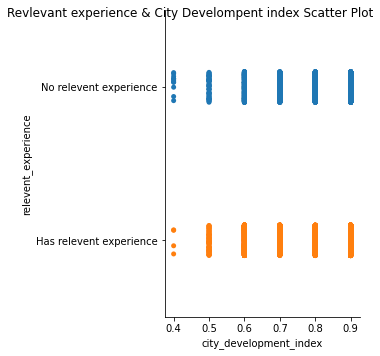

In [ ]:
ax1=se.catplot(y="relevent_experience",x="city_development_index",data=df)
ax1.fig.suptitle('Revlevant experience & City Develompent index Scatter Plot')

## Clean the dataset 

In [ ]:
df = pd.read_csv('XY_train.csv')

In [ ]:
df.head(1)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.91,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1


# Missing values in the gender column
we tried to predict the gender of the samples who mentioned the gender using KNN, and received a very good accuracy score (detailed output following this explanation) therefore we assumed KNN will predict the gender of the missing values in a similar accuracy as well.

In [ ]:
df_KNN  = df.dropna(axis=0, subset=['gender'])
# create an object for encoding non numerical values
le = preprocessing.LabelEncoder()

#  encoding non numerical values
city = le.fit_transform(df_KNN["city"].tolist())
city_development_index = le.fit_transform(df_KNN["city_development_index"].tolist())
relevent_experience = le.fit_transform(df_KNN["relevent_experience"].tolist())
enrolled_university = le.fit_transform(df_KNN["enrolled_university"].tolist())
education_level = le.fit_transform(df_KNN["education_level"].tolist())
major_discipline = le.fit_transform(df_KNN["major_discipline"].tolist())
relevent_experience = le.fit_transform(df_KNN["relevent_experience"].tolist())
#irrelevant_experience = le.fit_transform(df_KNN["irrelevant_experience"].tolist())
company_size = le.fit_transform(df_KNN["company_size"].tolist())
company_type = le.fit_transform(df_KNN["company_type"].tolist())
last_new_job = le.fit_transform(df_KNN["last_new_job"].tolist())
training_hours = le.fit_transform(df_KNN["training_hours"].tolist())
target = le.fit_transform(df_KNN["target"].tolist())
gender = le.fit_transform(df_KNN["gender"].tolist())

##### 

# recombine our data into a feature list and a label list
x = np.transpose(np.array([city, city_development_index,
       relevent_experience, enrolled_university, education_level,
       major_discipline, relevent_experience , company_size, company_type,
       last_new_job, training_hours, target]))  # irrelevant_experience
y = np.array(gender)
# assure the num of rows is equal
x.shape[0] == y.shape[0]

# split our data into training and testing data using the same process seen previously.
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2)

# create an array of models
models = []
for i in np.arange(1, 30, 2):
    models.append(neighbors.KNeighborsClassifier(n_neighbors=i))

# look for the most acurate model
best_acc = 0
best_amount_of_neighbors = 0
score = 0 
for model in models:
    model.fit(x_train, y_train)
    # cross validation using k-fold, and using the mean score. 
    score = np.mean(sk.model_selection.cross_val_score(model, x_test, y_test, cv=10)) 
    if score > best_acc:
        best_acc = score
        best_amount_of_neighbors = model.n_neighbors
#print(f'the most acurate model use {best_amount_of_neighbors} neighbors, and his acc is {round(best_acc, 3)}')

the most acurate model use 9 neighbors, and his acc is 0.909


In [ ]:
# predict the target with knn without any change to the original df 
df = pd.read_csv('XY_train.csv')
df_KNN  = df.dropna(axis=0, subset=['target'])
# create an object for encoding non numerical values
le = preprocessing.LabelEncoder()

#  encoding non numerical values
city = le.fit_transform(df_KNN["city"].tolist())
city_development_index = le.fit_transform(df_KNN["city_development_index"].tolist())
relevent_experience = le.fit_transform(df_KNN["relevent_experience"].tolist())
enrolled_university = le.fit_transform(df_KNN["enrolled_university"].tolist())
education_level = le.fit_transform(df_KNN["education_level"].tolist())
major_discipline = le.fit_transform(df_KNN["major_discipline"].tolist())
relevent_experience = le.fit_transform(df_KNN["relevent_experience"].tolist())
#irrelevant_experience = le.fit_transform(df_KNN["irrelevant_experience"].tolist())
company_size = le.fit_transform(df_KNN["company_size"].tolist())
company_type = le.fit_transform(df_KNN["company_type"].tolist())
last_new_job = le.fit_transform(df_KNN["last_new_job"].tolist())
training_hours = le.fit_transform(df_KNN["training_hours"].tolist())
target = le.fit_transform(df_KNN["target"].tolist())
gender = le.fit_transform(df_KNN["gender"].tolist())

##### 

# recombine our data into a feature list and a label list
x = np.transpose(np.array([city, city_development_index,
       relevent_experience, enrolled_university, education_level,
       major_discipline, relevent_experience , company_size, company_type,
       last_new_job, training_hours, gender]))  # irrelevant_experience
y = np.array(target)
# assure the num of rows is equal
x.shape[0] == y.shape[0]

# split our data into training and testing data using the same process seen previously.
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2)

# create an array of models
models = []
for i in np.arange(1, 30, 2):
    models.append(neighbors.KNeighborsClassifier(n_neighbors=i))

# look for the most acurate model
best_acc = 0
best_amount_of_neighbors = 0
score = 0 
for model in models:
    model.fit(x_train, y_train)
    # cross validation using k-fold, and using the mean score. 
    score = np.mean(sk.model_selection.cross_val_score(model, x_test, y_test, cv=10)) 
    if score > best_acc:
        best_acc = score
        best_amount_of_neighbors = model.n_neighbors
print(f'the most acurate model use {best_amount_of_neighbors} neighbors, and his acc is {round(best_acc, 3)}')

the most acurate model use 19 neighbors, and his acc is 0.78


In [ ]:
# predict the target with knn with part 1 changes: 

df = pd.read_csv('df_after_part_1.csv')
df_KNN  = df.dropna(axis=0, subset=['target'])
# create an object for encoding non numerical values
le = preprocessing.LabelEncoder()

#  encoding non numerical values
city_development_index = le.fit_transform(df_KNN["city_development_index"].tolist())
relevent_experience = le.fit_transform(df_KNN["relevent_experience"].tolist())
enrolled_university = le.fit_transform(df_KNN["enrolled_university"].tolist())
education_level = le.fit_transform(df_KNN["education_level"].tolist())
major_discipline = le.fit_transform(df_KNN["major_discipline"].tolist())
relevent_experience = le.fit_transform(df_KNN["relevent_experience"].tolist())
#irrelevant_experience = le.fit_transform(df_KNN["irrelevant_experience"].tolist())
company_size = le.fit_transform(df_KNN["company_size"].tolist())
company_type = le.fit_transform(df_KNN["company_type"].tolist())
last_new_job = le.fit_transform(df_KNN["last_new_job"].tolist())
training_hours = le.fit_transform(df_KNN["training_hours"].tolist())
target = le.fit_transform(df_KNN["target"].tolist())
gender = le.fit_transform(df_KNN["gender"].tolist())

##### 

# recombine our data into a feature list and a label list
x = np.transpose(np.array([city_development_index,
       relevent_experience, enrolled_university, education_level,
       major_discipline, relevent_experience , company_size, company_type,
       last_new_job, training_hours, gender]))  # irrelevant_experience
y = np.array(target)
# assure the num of rows is equal
x.shape[0] == y.shape[0]

# split our data into training and testing data using the same process seen previously.
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2)

# create an array of models
models = []
for i in np.arange(1, 30, 2):
    models.append(neighbors.KNeighborsClassifier(n_neighbors=i))

# look for the most acurate model
best_acc = 0
best_amount_of_neighbors = 0
score = 0 
for model in models:
    model.fit(x_train, y_train)
    # cross validation using k-fold, and using the mean score. 
    score = np.mean(sk.model_selection.cross_val_score(model, x_test, y_test, cv=10)) 
    if score > best_acc:
        best_acc = score
        best_amount_of_neighbors = model.n_neighbors
print(f'the most acurate model use {best_amount_of_neighbors} neighbors, and his acc is {round(best_acc, 3)}')

the most acurate model use 29 neighbors, and his acc is 0.763


# Fill the missing values using KNN 
replace all values to numric in order to do this.



In [ ]:
# encod all values 
lb_make = preprocessing.LabelEncoder()
for col in df.columns:
    df[col] = lb_make.fit_transform(df[col])

# null proportion before the cahnge 
num_of_nulls = df.gender.isnull().sum()
null_proportion = round(df.gender.isnull().sum() * 100 / len(df), 2)
#print(f'we have {len(df)} samples, {num_of_nulls} have a null value in the gender column, which acount for {null_proportion}% of the samples')
df.gender = df.gender.astype('string')
df.gender.replace({'Male':'1', 'Female':'2', 'Other':'3'}, inplace=True)
df.gender = df.gender.astype('float')

# impute values using KNN 
imputer = KNNImputer(n_neighbors=best_amount_of_neighbors)
imputed_data = imputer.fit_transform(df)  # impute all the missing data
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = df.columns

# keep only the imputed values from the gender column 
df = pd.read_csv('XY_train.csv')
df['gender'] = df_temp['gender']  # update only the desired column

# null proportion after the cahnge
num_of_nulls = df.gender.isnull().sum()
null_proportion = round(df.gender.isnull().sum() * 100 / len(df), 2)
#print(f'after the change we have {len(df)} samples, {num_of_nulls} have a null value in the gender column, which acount for {null_proportion}% of the samples')
# the proportion is very small now so we will just remove those rows. 
df = df.loc[df.gender.isnull() ==  False]
df.gender = df.gender.apply(round)   
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,3,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,1,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,1,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,1,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,1,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


# Feature Extraction

In [ ]:
len(df) == len(df.drop_duplicates())   # assure we do not have duplicate values 

True

In [ ]:
list(df.last_new_job.drop_duplicates())

['never', '1', '2', '>4', nan, '3', '4']

In [ ]:
df.last_new_job.replace({'>4':'5', 'never':'0'}, inplace=True)
'''We assumed that the ones who didn't fill that part of the form has no experience because candidates to a DS role have the 
incentive to report details that makes them look good candidates. '''
df.last_new_job.fillna('0', inplace=True) 
df.last_new_job = df.last_new_job.astype('int')
list(df.last_new_job.drop_duplicates().sort_values()) # we can see that there are no rows with the values we wanted to change, as resquested.

[0, 1, 2, 3, 4, 5]

In [ ]:
df[['relevent_experience', 'experience']].head()  

,relevent_experience,experience
0,No relevent experience,2
1,Has relevent experience,6
2,No relevent experience,3
3,No relevent experience,3
4,Has relevent experience,4


In [ ]:
'''
we will create a new feature named 'irrelevant_experience' because it might contain relvant information to the predictig model, 
but it is not in the same scale as the relevant experience. 
we are assuming that a candidate with relevant experience does not have irrelevant experience, or that his 
irrelevent experience is irrelevant.
therfore the changes we did are: 
- the experience column will be renamed to 'relevant_experience' and will contain the number of relevant years of experince.
in cases there is no relevant experience it will contain 0. 
- the irrelevant experience column will contain the number of irrelvant years of experince.
in cases there is no irrelevant experience it will contain 0. 
'''
df['irrelevant_experience'] = df[['relevent_experience','experience']].apply(lambda x: x['experience'] if x['relevent_experience']== 'No relevent experience' else 0, axis=1)
df.loc[df['relevent_experience'] == 'No relevent experience', 'experience'] = 0
df = df.drop(columns = ['relevent_experience']) # remove the '#', i deleted so it will run again 
df.rename(columns={'experience':'relevent_experience'},inplace=True)

In [ ]:
df[['relevent_experience', 'irrelevant_experience']].head()  

,relevent_experience,irrelevant_experience
0,0,2
1,6,0
2,0,3
3,0,3
4,4,0


In [ ]:
df.relevent_experience.drop_duplicates()

0        0
1        6
4        4
5      >20
7       13
8       19
9       10
10       3
13       2
24       7
26      20
28      14
32      16
34      12
41      15
42       8
45      <1
48       5
50      17
60       9
70      11
221     18
309      1
980    NaN
Name: relevent_experience, dtype: object

In [ ]:
df.loc[df.relevent_experience == '>20', 'relevent_experience'] = '20'  # we changed the option of ">20" to "21" because we already have samples with the value "20"
df.loc[df.relevent_experience == '<1', 'relevent_experience'] = '0'    # there are no people without eperience in this dataset, so rounding down the ones with less thean a year makes sense.

In [ ]:
num_of_nulls = df.relevent_experience.isnull().sum()
null_proportion = round(df.relevent_experience.isnull().sum() * 100 / len(df), 2)
print(f'we have {len(df)} samples, {num_of_nulls} are null, which acount for {null_proportion}% of the samples')

we have 15326 samples, 34 are null, which acount for 0.22% of the samples


In [ ]:
df = df[df['relevent_experience'].notna()]
df['relevent_experience'] = df['relevent_experience'].astype('int')
df.loc[df.relevent_experience.isnull()] # we can see there are no null values after the change.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,enrollee_id,city,city_development_index,gender,enrolled_university,education_level,major_discipline,relevent_experience,company_size,company_type,last_new_job,training_hours,target,irrelevant_experience


In [ ]:
list(df.relevent_experience.drop_duplicates().sort_values()) # no rows with the values we wanted to change, as resquested.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
list(df.irrelevant_experience.drop_duplicates())

['2',
 0,
 '3',
 '6',
 '1',
 '5',
 '4',
 '16',
 '>20',
 '<1',
 '14',
 '8',
 '10',
 '18',
 '11',
 '15',
 '7',
 '9',
 nan,
 '12',
 '19',
 '20',
 '13',
 '17']

In [ ]:
df.irrelevant_experience.replace({'>20':'20', '<1':'0'}, inplace = True)

In [ ]:
num_of_nulls = df.irrelevant_experience.isnull().sum()
null_proportion = round(df.irrelevant_experience.isnull().sum() * 100 / len(df), 2)
print(f'we have {len(df)} samples, {num_of_nulls} are null, which acount for {null_proportion}% of the samples')

we have 15292 samples, 14 are null, which acount for 0.09% of the samples


In [ ]:
df = df[df['irrelevant_experience'].notna()]
df['irrelevant_experience'] = df['irrelevant_experience'].astype('int')
len(df.loc[df['irrelevant_experience'].isnull()]) # we can see there are no null values after the change.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

In [ ]:
list(df.irrelevant_experience.drop_duplicates().sort_values()) # no rows with the values we wanted to change, as resquested.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
c

['no_enrollment', nan, 'Full time course', 'Part time course']

In [ ]:
df.enrolled_university.fillna('no_enrollment', inplace=True)
df.enrolled_university = df.enrolled_university.astype('string')

In [ ]:
list(df.enrolled_university.drop_duplicates())

['no_enrollment', 'Full time course', 'Part time course']

In [ ]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'enrolled_university', 'education_level', 'major_discipline',
       'relevent_experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target', 'irrelevant_experience'],
      dtype='object')

In [ ]:
list(df.education_level.drop_duplicates())

['High School', 'Masters', nan, 'Graduate', 'Phd', 'Primary School']

We decided to give indexes to  the "Education Level" feature from the least (1) to most educated(5) according the following rules:
Primary school - 1
High School - 2
Graduate - 3
Masters - 4
PHD - 5
we decided to change the null values to '0', because we assume in such a program candidates have the motivation to report every
detail that can make them look better. 


In [ ]:
educ_dict = dict({'Primary School':1, 'High School': 2 ,'Graduate':3, 'Masters':4,'PHD':5, 'Phd':5})
df.education_level.replace(educ_dict, inplace=True)
df.education_level.fillna(0, inplace=True)
df.education_level = df.education_level.astype('int')

In [ ]:
list(df.education_level.drop_duplicates().sort_values())

[0, 1, 2, 3, 4, 5]

In [ ]:
list(df.company_size.drop_duplicates())

[nan,
 '1000-4999',
 '500-999',
 '<10',
 '50-99',
 '10000+',
 '5000-9999',
 '100-500',
 'Oct-49']

In [ ]:
'''We have decided to convert the values in the "Company_Size" feature to the average value of the minimum and maximum sizes:
10-49 will become 29
50-99 will become 74
we will address 100-500 as 100-499 and it  will become 299
500-999 will become 749
1000-4999 will become 2999
5000-9999 will become 7499
The edge values "<10" and "10000+" will become "10" and "10000" respectively
'''

# fix the type of the column in order to work with our changes
df.company_size = df.company_size.astype('str')

#  replacing the wrong values of 'oct 49' to 10-49
df.loc[df.company_size == 'Oct-49', 'company_size'] = '10-49'

company_size_dict = dict({'<10': 10 , '10000+': 10000})
df.replace({"company_size": company_size_dict}, inplace=True)

In [ ]:
def extract_middle(string):
    if string == 'nan':
        return 0                    # there are no companies in size 0, so I will know that the ones with 0 are the one that were null 
    splited = string.split('-')
    splited[0].replace(' ', '')
    if len(splited) == 1:
        return splited[0]
    if len(splited) == 2:
        splited[1].replace(' ', '')
        return (int(splited[0]) + int(splited[1])) / 2
    else: 
        return null

In [ ]:
list(df.company_size.drop_duplicates())

['nan',
 '1000-4999',
 '500-999',
 10,
 '50-99',
 10000,
 '5000-9999',
 '100-500',
 '10-49']

In [ ]:
df.company_size = df.company_size.astype('string')
df.company_size = df.company_size.apply(extract_middle)
df.company_size = df.company_size.astype('float')

In [ ]:
list(df.company_size.drop_duplicates().sort_values())

[0.0, 10.0, 29.5, 74.5, 300.0, 749.5, 2999.5, 7499.5, 10000.0]

In [ ]:
df.company_size = df.company_size.astype('float')
df.company_size = df.company_size.replace(0, df["company_size"].mean())          # we will replace null with the mean, explanation in the word file. 

In [ ]:
list(df.company_size.drop_duplicates())    

[1576.6972116769211, 2999.5, 749.5, 10.0, 74.5, 10000.0, 7499.5, 300.0, 29.5]

In [ ]:
list(df.company_type.drop_duplicates())

[nan,
 'Pvt Ltd',
 'Public Sector',
 'NGO',
 'Other',
 'Early Stage Startup',
 'Funded Startup']

In [ ]:
# change the nulls to 'unknown'
df.company_type.fillna('unknown', inplace=True) 

In [ ]:
#change the other to 'unknown'
df.loc[df.company_type == 'Other', 'company_type'] = 'unknown'

In [ ]:
list(df.company_type.drop_duplicates())

['unknown',
 'Pvt Ltd',
 'Public Sector',
 'NGO',
 'Early Stage Startup',
 'Funded Startup']

In [ ]:
df.major_discipline.drop_duplicates()

0                 NaN
1                STEM
29               Arts
32              Other
33         Humanities
45           No Major
66    Business Degree
Name: major_discipline, dtype: object

In [ ]:
# the missing values proportion in the major_discipline feature was at first:
round(df.major_discipline.isnull().sum() * 100 / len(df), 2)

14.54

In [ ]:
df.education_level.drop_duplicates()

0      2
1      4
2      0
4      3
12     5
188    1
Name: education_level, dtype: int64

In [ ]:
# we changed the major_discipline feature of samples of people who does not have a degree to "no degree"
df.education_level = df.education_level.astype('int')
df.loc[df.education_level < 3, 'major_discipline'] = "no degree"

In [ ]:
# after the change the missing values proportion is:
round(df.major_discipline.isnull().sum() * 100 / len(df), 2)

0.14

In [ ]:
# and the number missing values is:
df.major_discipline.isnull().sum()

21

In [ ]:
# beacuse this is a very small number of samples we decided to remove them
df = df[df['major_discipline'].notna()]

In [ ]:
list(df.major_discipline.drop_duplicates()) # we can see now that there are no null values

['no degree',
 'STEM',
 'Arts',
 'Other',
 'Humanities',
 'No Major',
 'Business Degree']

In [ ]:
# corr matrix for the first part 
df_temp = df.drop(columns=['enrolled_university','major_discipline', 'company_type', 'gender', 'company_size', 'irrelevant_experience', 'education_level'])
df_temp = df_temp.rename(columns={'relevent_experience': 'experience'})
corr = df_temp.corr()
corr.style.background_gradient(cmap='coolwarm')

,enrollee_id,city_development_index,experience,last_new_job,training_hours,target
enrollee_id,1.000000,-0.041867,-0.038867,-0.021202,0.001027,0.046076
city_development_index,-0.041867,1.000000,0.257403,0.194747,0.002086,-0.342840
experience,-0.038867,0.257403,1.000000,0.413949,0.007771,-0.182483
last_new_job,-0.021202,0.194747,0.413949,1.000000,-0.007220,-0.083410
training_hours,0.001027,0.002086,0.007771,-0.007220,1.000000,-0.025922
target,0.046076,-0.342840,-0.182483,-0.083410,-0.025922,1.000000


# Feature representation Normalize continuous variables

In [ ]:
def min_max_normalize(min, max, value):
    return (value - min) / (max - min)

In [ ]:
def normalize_col(col):
    min = df[col].min()
    max = df[col].max()
    df[col] = df[col].apply(lambda x: min_max_normalize(min=min, max=max, value=x))

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,enrolled_university,education_level,major_discipline,relevent_experience,company_size,company_type,last_new_job,training_hours,target,irrelevant_experience
0,13163,city_16,0.910,3,no_enrollment,2,no degree,0,1576.697212,unknown,0,16,1,2
1,9357,city_136,0.897,1,no_enrollment,4,STEM,6,2999.500000,Pvt Ltd,1,262,0,0
2,604,city_16,0.910,1,no_enrollment,0,no degree,0,1576.697212,unknown,0,24,0,3
3,19033,city_16,0.910,1,no_enrollment,2,no degree,0,1576.697212,unknown,1,35,0,3
4,4825,city_145,0.555,1,Full time course,3,STEM,4,1576.697212,unknown,1,43,1,0


In [ ]:
columns_to_normalize = ['relevent_experience', 'irrelevant_experience', 'training_hours', 'company_size', 'education_level', 'last_new_job']
df[columns_to_normalize].head()

,relevent_experience,irrelevant_experience,training_hours,company_size,education_level,last_new_job
0,0,2,16,1576.697212,2,0
1,6,0,262,2999.500000,4,1
2,0,3,24,1576.697212,0,0
3,0,3,35,1576.697212,2,1
4,4,0,43,1576.697212,3,1


In [ ]:
for col in columns_to_normalize:
    normalize_col(col)
df[columns_to_normalize].head()

,relevent_experience,irrelevant_experience,training_hours,company_size,education_level,last_new_job
0,0.0,0.10,0.044776,0.156827,0.4,0.0
1,0.3,0.00,0.779104,0.299249,0.8,0.2
2,0.0,0.15,0.068657,0.156827,0.0,0.0
3,0.0,0.15,0.101493,0.156827,0.4,0.2
4,0.2,0.00,0.125373,0.156827,0.6,0.2


In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,enrolled_university,education_level,major_discipline,relevent_experience,company_size,company_type,last_new_job,training_hours,target,irrelevant_experience
0,13163,city_16,0.910,3,no_enrollment,0.4,no degree,0.0,0.156827,unknown,0.0,0.044776,1,0.10
1,9357,city_136,0.897,1,no_enrollment,0.8,STEM,0.3,0.299249,Pvt Ltd,0.2,0.779104,0,0.00
2,604,city_16,0.910,1,no_enrollment,0.0,no degree,0.0,0.156827,unknown,0.0,0.068657,0,0.15
3,19033,city_16,0.910,1,no_enrollment,0.4,no degree,0.0,0.156827,unknown,0.2,0.101493,0,0.15
4,4825,city_145,0.555,1,Full time course,0.6,STEM,0.2,0.156827,unknown,0.2,0.125373,1,0.00


#Feature Selection 

In [ ]:
df[['enrollee_id', 'city']].head()
# drop the id and city columns because they are irrelevant to the prediction mission. 
df.drop(columns=['enrollee_id', 'city'], inplace = True)

In [ ]:
df.columns

Index(['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'major_discipline', 'relevent_experience',
       'company_size', 'company_type', 'last_new_job', 'training_hours',
       'target', 'irrelevant_experience'],
      dtype='object')

In [ ]:
df.head()

,city_development_index,gender,enrolled_university,education_level,major_discipline,relevent_experience,company_size,company_type,last_new_job,training_hours,target,irrelevant_experience
0,0.910,3,no_enrollment,0.4,no degree,0.0,0.156827,unknown,0.0,0.044776,1,0.10
1,0.897,1,no_enrollment,0.8,STEM,0.3,0.299249,Pvt Ltd,0.2,0.779104,0,0.00
2,0.910,1,no_enrollment,0.0,no degree,0.0,0.156827,unknown,0.0,0.068657,0,0.15
3,0.910,1,no_enrollment,0.4,no degree,0.0,0.156827,unknown,0.2,0.101493,0,0.15
4,0.555,1,Full time course,0.6,STEM,0.2,0.156827,unknown,0.2,0.125373,1,0.00


In [ ]:
df_temp = df
lb_make = preprocessing.LabelEncoder()
for col in ['enrolled_university', 'major_discipline', 'company_type', 'gender']:
    df_temp[col] = lb_make.fit_transform(df_temp[col])
df_temp = df.astype('float')
df_temp.head()

,city_development_index,gender,enrolled_university,education_level,major_discipline,relevent_experience,company_size,company_type,last_new_job,training_hours,target,irrelevant_experience
0,0.910,3.0,2.0,0.4,6.0,0.0,0.156827,5.0,0.0,0.044776,1.0,0.10
1,0.897,1.0,2.0,0.8,5.0,0.3,0.299249,4.0,0.2,0.779104,0.0,0.00
2,0.910,1.0,2.0,0.0,6.0,0.0,0.156827,5.0,0.0,0.068657,0.0,0.15
3,0.910,1.0,2.0,0.4,6.0,0.0,0.156827,5.0,0.2,0.101493,0.0,0.15
4,0.555,1.0,0.0,0.6,5.0,0.2,0.156827,5.0,0.2,0.125373,1.0,0.00


In [ ]:
def stepwise_regression(x, y):
    results = sm.OLS(y, x).fit()
    print(results.summary())

In [ ]:
df.columns

Index(['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'major_discipline', 'relevent_experience',
       'company_size', 'company_type', 'last_new_job', 'training_hours',
       'target', 'irrelevant_experience'],
      dtype='object')

In [ ]:
# step 1 :
x = df_temp[['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'major_discipline', 'relevent_experience',
       'company_size', 'company_type', 'last_new_job', 'training_hours', 'irrelevant_experience']]
y = df_temp['target']
stepwise_regression(x=x, y=y)

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.324
Model:                            OLS   Adj. R-squared (uncentered):              0.324
Method:                 Least Squares   F-statistic:                              664.9
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:19:23   Log-Likelihood:                         -8055.4
No. Observations:               15257   AIC:                                  1.613e+04
Df Residuals:                   15246   BIC:                                  1.622e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
# step 2 : without training_hours  
x = df_temp[['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'major_discipline', 'relevent_experience',
       'company_size', 'company_type', 'last_new_job', 'irrelevant_experience']]
y = df_temp['target']
stepwise_regression(x=x, y=y)

In [ ]:
# step 2 : without training_hours  
x = df_temp[['irrelevant_experience']]
y = df_temp['target']
stepwise_regression(x=x, y=y)

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.054
Model:                            OLS   Adj. R-squared (uncentered):              0.054
Method:                 Least Squares   F-statistic:                              875.1
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                   4.59e-187
Time:                        15:19:26   Log-Likelihood:                         -10619.
No. Observations:               15257   AIC:                                  2.124e+04
Df Residuals:                   15256   BIC:                                  2.125e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

# Dimension Reduction

In [ ]:
df_temp = df.drop(columns=['enrolled_university','major_discipline', 'company_type', 'gender'])
corr = df_temp.corr()
corr.style.background_gradient(cmap='coolwarm')

,city_development_index,education_level,relevent_experience,company_size,last_new_job,training_hours,target,irrelevant_experience
city_development_index,1.000000,0.043009,0.257403,0.062486,0.194747,0.002086,-0.342840,0.062273
education_level,0.043009,1.000000,0.235498,0.080622,0.199889,-0.017662,-0.000661,-0.011940
relevent_experience,0.257403,0.235498,1.000000,0.053346,0.413949,0.007771,-0.182483,-0.477565
company_size,0.062486,0.080622,0.053346,1.000000,0.081975,-0.005354,-0.023954,0.030581
last_new_job,0.194747,0.199889,0.413949,0.081975,1.000000,-0.007220,-0.083410,0.011320
training_hours,0.002086,-0.017662,0.007771,-0.005354,-0.007220,1.000000,-0.025922,-0.012445
target,-0.342840,-0.000661,-0.182483,-0.023954,-0.083410,-0.025922,1.000000,0.045551
irrelevant_experience,0.062273,-0.011940,-0.477565,0.030581,0.011320,-0.012445,0.045551,1.000000


# Dimensionality reduction

In [ ]:
df_x = df

In [ ]:
df_x.columns

Index(['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'major_discipline', 'relevent_experience',
       'company_size', 'company_type', 'last_new_job', 'training_hours',
       'target', 'irrelevant_experience'],
      dtype='object')

In [ ]:
# Load the data
x = df_x[['relevent_experience','last_new_job']]
y = df_x.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
x_new = pca.fit_transform(x) # project the original data into the PCA space

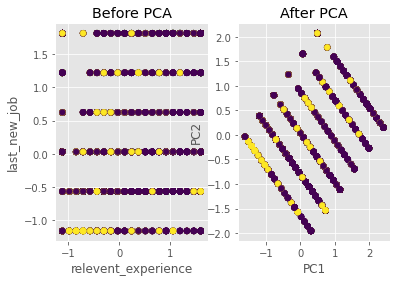

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2)
axes[0].scatter(x[:,0], x[:,1], c=y)
axes[0].set_xlabel('relevent_experience')
axes[0].set_ylabel('last_new_job')
axes[0].set_title('Before PCA')
axes[1].scatter(x_new[:,0], x_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[0.70697455 0.29302545]


In [ ]:
# We can see that in the PCA space, the variance is maximized along PC1 (explains 70.7% of the variance) and PC2 (explains 29.2% of the variance). Together, they explain 99% of the variance.

In [ ]:
df.columns

Index(['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'major_discipline', 'relevent_experience',
       'company_size', 'company_type', 'last_new_job', 'training_hours',
       'target', 'irrelevant_experience'],
      dtype='object')

In [ ]:
# Load the data
x = df_x[['relevent_experience','irrelevant_experience']]
y = df_x.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
x_new = pca.fit_transform(x) # project the original data into the PCA space

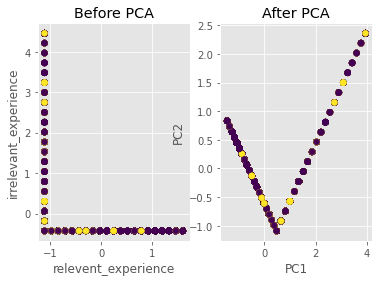

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2)
axes[0].scatter(x[:,0], x[:,1], c=y)
axes[0].set_xlabel('relevent_experience')
axes[0].set_ylabel('irrelevant_experience')
axes[0].set_title('Before PCA')
axes[1].scatter(x_new[:,0], x_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[0.73873949 0.26126051]


In [ ]:
df = pd.read_csv("df_after_part_1.csv")

In [ ]:
df.to_csv('df_after_part_1.csv')
from google.colab import files
files.download("df_after_part_1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SVM

In [ ]:
from sklearn import svm
import sklearn

In [ ]:
x = df[['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'major_discipline', 'relevent_experience',
       'company_size', 'company_type', 'last_new_job', 'training_hours', 'irrelevant_experience']]
y = df['target']
# spliting the data to avoid overfitting 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [ ]:
# create the model object 
# the kernel is the function used to draw the line between the groups from each class
# 'c' refers to the option to outliers, c=0 means no outliers allowed, c=1 is the default amount of outliers, and c=2 is double the amount then c=1

In [ ]:
best_c = 0
best_acc = 0
for c in range (100, 300, 100):
    clf = svm.SVC(kernel="linear", C=c)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = sklearn.metrics.accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_acc = acc
        best_c = c

In [ ]:
# predict the values
print(best_acc)
print(best_c)